In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Define class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 48ms/step - accuracy: 0.3726 - loss: 1.7006 - val_accuracy: 0.5632 - val_loss: 1.2029
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 51ms/step - accuracy: 0.5951 - loss: 1.1509 - val_accuracy: 0.6097 - val_loss: 1.0975
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 75s 47ms/step - accuracy: 0.6557 - loss: 0.9727 - val_accuracy: 0.6701 - val_loss: 0.9454
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.7009 - loss: 0.8529 - val_accuracy: 0.6850 - val_loss: 0.9024
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.7409 - loss: 0.7380 - val_accuracy: 0.7103 - val_loss: 0.8336
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.7663 - loss: 0.6574 - val_accuracy: 0.7015 - val_loss: 0.8810
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 46ms/step - accuracy: 0.7909 - loss: 0.5903 - val_accuracy: 0.7158 - val_loss: 0.8403
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 47ms/step - accuracy: 0.8151 -

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

313/313 - 3s - 11ms/step - accuracy: 0.7109 - loss: 0.9609
Test accuracy: 0.7109


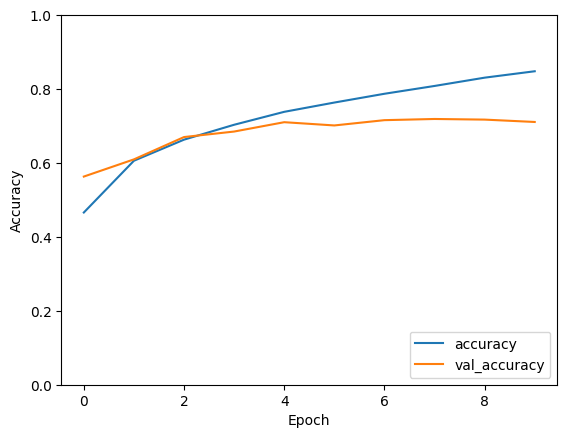

In [ ]:
# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Save the model
model.save("image_classification_model.h5")

In [ ]:
# Load and use the model for predictions
loaded_model = keras.models.load_model("image_classification_model.h5")
predictions = loaded_model.predict(x_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


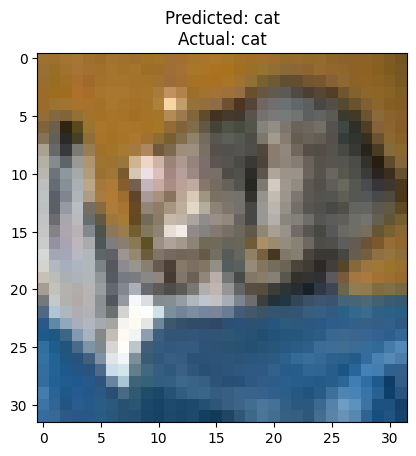

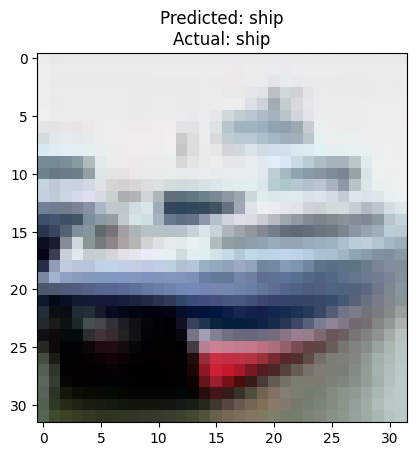

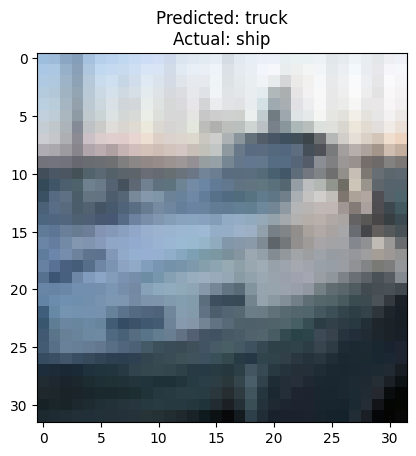

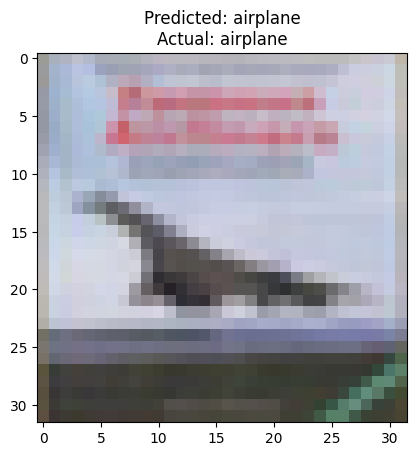

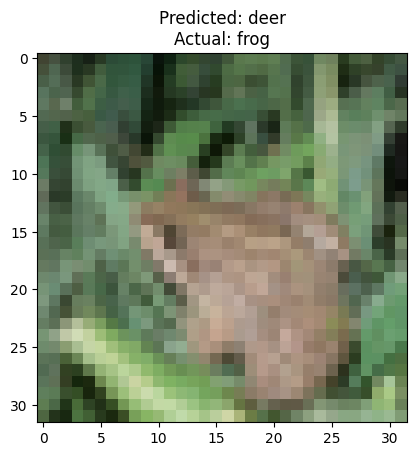

In [ ]:
# Display predictions
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}\nActual: {class_names[y_test[i][0]]}")
    plt.show()